# Introdução

Relatório do projeto final desenvolvido para a disciplina Fundamentos de Matemática para Computação, ministrada pelo Prof. Dr. Saul Leite na Universidade Federal do ABC durante o primeiro quadrimestre de 2020.

Neste projeto, estudaremos a regressão Lasso, um método utilizado tanto para a tarefa de regressão como para a tarefa de seleção de variáveis. 

O artigo principal de estudo, **Regression Shrinkage and Selection via the Lasso**, publicado em 1996 por _Robert Tibshirani_, pode ser acessado online [neste link](https://statweb.stanford.edu/~tibs/lasso/lasso.pdf).

A ideia é apresentar a fundamentação matemática do método, e então uma implementação. Vários sites foram usados de suporte durante a escrita do projeto, e serão devidamente referenciados por hyperlinks ao longo do texto, servindo como referências secundárias. Tratam-se de sites com discussões interessantes sobre o Lasso, que ajudaram a entender melhor o artigo principal.

Durante o curso, aprendemos sobre a regressão linear, e vimos diferentes formas fechadas de calcular sua solução. Uma dessas formas, em particular, conhecida como Ordinary Least Squares (OLS), é bastante referenciada, e é uma das formas utilizadas para calcular os coeficientes da regressão linear. Neste projeto, iremos estudar mais a fundo uma variação da regressão linear: a regressão Lasso.

# Regressão Linear

Antes de entrarmos no tópico principal, vamos revisar alguns conceitos de regressão linear.

De uma forma bem simples, as técnicas de regressão são utilizadas para ajustar os coeficientes de uma função matemática de forma que essa função seja capaz de mapear uma ou mais variáveis $x$, com $x \in \mathbb{R}$ ou $\mathbf{x} \in \mathbb{R}^n$ (chamadas de variáveis explanatórias ou variáveis independentes) a uma variável $y$ (variável alvo, ou variável dependente), $y \in \mathbb{R}$.

Podemos ter o caso onde há apenas uma variável explanatória $x \in \mathbb{R}$; ou o caso onde $\mathbf{x} \rightarrow \mathbb{R}^n$, $\mathbf{x}$ é um vetor de tamanho $n$, onde cada elemento $x_i$ corresponde a uma variável explanatória. No restante das explicações que seguem, será tratado sempre o caso em que $\mathbf{x} \in \mathbb{R}^n$ e, portanto, $\mathbf{x}$ é um vetor, escrito em minúsculo e em negrito. Utilizaremos esta análise pois as conclusões para $\mathbb{R}^n$ também são válidas para o caso onde $n=1$, isto é, $\mathbb{R}$, sem perda de generalidade.

Suponha que exista uma função $f(\mathbf{x}) = y$ desconhecida --- a tarefa de regressão é ajustar uma função $\hat{f}(\mathbf{x})$, com  $\hat{f}(\mathbf{x}): \mathbb{R}^n \rightarrow \mathbb{R}$, através da escolha de coeficientes internos de $\hat{f}$ de forma a minimizar uma função de custo entre os valores reais $y$ observados com os valores preditos $\hat{y} = \hat{f}(\mathbf{x})$ para cada par $(\mathbf{x}, y)$ de pontos dados. Geralmente, esses pares de pontos são obtidos de experimentos e observações, e deseja-se modelar uma função que descreva o comportamento das variáveis.

Existem, essencialmente, 3 tipos de regressões:
- **Paramétricas**: o caso que $\hat{f}$ é definida previamente, e o processo de regressão busca ajustar apenas coeficientes livres dessa função. Um exemplo é a própria regressão linear, ou a regressão logística.
- **Não paramétricas**: quando tanto os coeficientes livres quanto a própria função são ajustados durante o processo. Essas técnicas costumam ser mais elaboradas e computacionalmente custosas, pois o espaço de busca se torna muito mais amplo, podendo abranger todas as equações matemáticas possíveis. Ainda, devido à maior flexibilidade, esses métodos costumam precisar de mais dados para conseguir fazer um ajuste aceitável. Um exemplo é a regressão simbólica.
- **Semi-paramétricas**: quando a função apresenta uma parte fixa (pré definida) e uma parte ajustável nos mesmos moldes que regressões não paramétricas.

Como mencionado, a regressão linear, é paramétrica, de forma que sua solução vem do ajuste de coeficientes livres ($\beta_i$, com $i=1, 2, \ldots, n$) da combinação linear das $n$ variáveis explanatórias do problema, e costuma incluir também um coeficiente não associado às variáveis, representando o intercepto ($\beta_0$). Sendo assim, queremos estimar valores para os coeficientes livres de forma a minimizar o erro.

Supondo o conjunto de pontos $\{\mathbf{x_{i}}, y_{i}\}_{i=1,2,\ldots,d}$, onde $d$ é o total de observações, e cada par $(\mathbf{x}, y)$ é um vetor de variáveis dependentes $\mathbf{x} \in \mathbb{R}^{n}$ que se relacionam com a variável independente escalar $y \in \mathbb{R}$, ou seja $y$ é o resultado da aplicação de uma função desconhecida $f$ sobre as variáveis dependentes, $y = f(\mathbf{x})$, na regressão linear,partimos da suposição de que a computação que a função $f$ realiza é a combinação linear das $x_i$ variáveis dependentes, com $i=1, 2, \ldots, n$ sendo que cada variável $x_i$ tem um peso associado. Chamaremos de $\widehat{f}$ a função estimada, que é definida por:

$$\widehat{y} = \widehat{f}(\mathbf{x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n,$$

ou, em forma de vetores:

$$\widehat{y} = \mathbf{x}^{T} \beta,$$

onde $\beta_0$ é o intercepto.

Note que isso é a definição de um hiper-plano, uma generalização de uma reta para o espaço $\mathbb{R}^n$. Nosso objetivo é minimizar o erro entre esse hiper-plano definido por $\widehat{f}$ e os pontos observados $\{\mathbf{x_{i}}, y_{i}\}$ --- dessa forma, a regressão linear busca ajustar os coeficientes de um hiperplano no espaço das variáveis explanatórias. Geralmente, o erro é medido pela Soma dos Resíduos ao Quadrado (RSS, da sigla em inglês):

$$\text{RSS} = \sum^{n}_{i=1} (\widehat{y}_{i} - y_i)^2,$$

onde $\widehat{y}_{i} - y_i$ é o resíduo $\epsilon$.

Para ajustar $\widehat{f}$, queremos encontrar um vetor $\beta$ ótimo ($\widehat{\beta}$) que minimize o RSS. Supondo que $y$ é a solução do sistema $y = \mathbf{x}^{T} \widehat{\beta}$, queremos então:

$$\widehat{\beta} = min \text{ RSS}(\beta),$$

Onde o RSS para um dado $\beta$ é calculado por:

$$RSS(\beta) = \sum^{n}_{i=1} (\mathbf{x}^{T}_{i} \beta - y_i)^2.$$

Esse problema tem solução única desde que as $n$ colunas sejam Linearmente Independentes (L.I.), e pode ser calculado resolvendo o sistema obtido pela equação acima. Esse sistema pode ser escrito e resolvido de forma matricial. Existe uma forma de derivação desse problema, chamado de **Método dos Mínimos Quadrados** (OLS, da sigla em inglês), que dá o seguinte resultado:

$$(X^T X)\widehat{\beta} = X^T y,$$

onde $X$ é o conjunto de todos os pontos observados:

$$X = \begin{bmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,n} \\ 
x_{2,1} & x_{2,2} & \ldots & x_{2,n} \\ 
\vdots & \vdots & \ddots  & \vdots \\ 
x_{d,1} & x_{d,2} & \ldots & x_{d,n}
\end{bmatrix}.$$

Dessa forma, isolando $\widehat{\beta}$:

$$\widehat{\beta} = (X^T X)^{-1} X^T y.$$

A ideia por trás do Método dos Mínimos Quadrados é que, ao minimizar a soma dos quadrados dos resíduos, estamos estimando $\widehat{y}$. De uma forma geral:

$$\widehat{y} = \beta \mathbf{x}^T_i + \epsilon_i.$$

Isolando e elevando ao quadrado, obtemos: $\epsilon_i^2 = (\widehat{y} - \mathbf{x}^T_i\beta)^2$. Dessa forma, se derivarmos $\text{RSS}(\beta)$ e igualarmos a zero:

$$\frac{d}{d\beta}\text{RSS}(\beta) = 0,$$

podemos encontrar a solução ótima --- é dessa forma que obtemos a solução ótima na forma fechada que foi apresentada ([mais detalhes aqui](https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados)).

A regressão linear apresenta bons resultados quando as variáveis explanatórias e a variável alvo interagem de forma linear. Porém, em alguns casos, pode ser de interesse evitar alguns problemas como o _overfit_ nos dados. A próxima sessão irá apresentar uma estratégia para contornar o problema.

# Regularização da regressão linear

A <a href="https://en.wikipedia.org/wiki/Regularization_(mathematics)">regularização</a> é o processo de se adicionar informações para resolver um problema de regressão, buscando prevenir o _overfitting_ --- quando pontos fora da curva acabam impactando negativamente o ajuste da reta, gerando uma aproximação que minimiza o erro mas não necessariamente condiz com o comportamento intrínseco que estamos tentando representar por meio de uma função linear.

Até agora, estamos encontrando a solução dos coeficientes da regressão linear resolvendo o seguinte problema:

$$\widehat{\beta} = min(\sum^{n}_{i=1}(\widehat{y}_i - y_i)^2).$$

Vamos adicionar um termo regularizador na nossa função, chamado de $R(f)$. Denotando o RSS por $V$, temos:

$$\widehat{\beta} = min(V + R(f)).$$

Agora, precisamos escolher o termo regularizador $R(f)$ de forma que imponha uma penalidade de complexidade $f$, restringindo o espaço de soluções em uma região que contenha candidatos desejáveis. 

Antes de continuar, vamos recordar o conceito de **norma**. Toda função $N: \mathbb{R}^n \rightarrow \mathbb{R}$, que satisfaz as condições:

1. $\left \| \alpha x \right \| = \left | \alpha \right | \left \| x \right \|$;
2. $\left \| x \right \| \geq 0$, para todo $x \in \mathbb{R}^n$, e $\left \| x \right \| = 0$ se e somente se $x=0$;
3. $\left \| x + y \right \| \leq \left \| x \right \| + \left \| y \right \|$ (inequação do triângulo);

é uma norma. De forma geral, temos uma norma-p definida como:

$$\left \| x \right \|_p = (\sum^{n}_{i=1} \left | x_i \right |^p)^{\frac{1}{p}},$$

onde $p \in [1, \infty)$. Relembrando, o RSS é definido como:

$$RSS = \sum^{n}_{i=1} (\widehat{y}_{i} - y_i)^2,$$

onde $\mathbf{y}$ é uma matriz coluna com os valores de $y_i$, e $\mathbf{X}$ é a matriz de variáveis explanatórias descrita anteriormente. Se incluirmos nessa equação uma penalidade sobre $\beta$, dada por $\lambda \left \| \beta \right \|_1$, com $\lambda$ sendo o coeficiente de penalidade (ou parâmetro de regularização), temos agora que nosso $\hat{\beta}$ será calculado por:

$$\widehat{\beta} = min(\text{RSS} + \lambda \left \| \beta \right \|_1)$$

$$\Rightarrow \widehat{\beta} = min(\sum^{n}_{i=1} (y_i - \beta \mathbf{x}^T _i)^2 + \lambda \sum^{n}_{j=1} \left | \beta_j \right |).$$

O primeiro termo dessa equação ($\sum^{n}_{i=1} (y_i - \beta \mathbf{x}^T _i)^2$) é a já conhecida soma dos erros. O segundo termo ($\lambda \sum^{n}_{j=1} \left | \beta_j \right |$) é a penalidade adicionada. Na literatura, utilizar como penalidade a norma $l_1$ para a tarefa de regressão recebe um nome especial: Regressão Lasso, Regressão com normalização $L_1$, ou apenas Lasso.

Falta agora justificar a escolha da norma $L_1$ como regularizador da regressão linear. A adição do termo de penalidade gera uma restrição no espaço de busca --- esse termo particular de penalidade da norma $l_1$ tem forma de "diamante", restringindo a região de busca na seguinte forma:

![Região de restrição imposta por $l_1$](lasso_regression2.png)

Com isso, dado que $\lambda$ seja adequado, $\widehat{\beta}$ será encontrado em um ponto ótimo tal que, seja a região de diamante a região da função objetivo Lasso, e as elipses o gradiente da função RSS minimizada pelo OLS, o ponto ótimo (que seja mínimo dentro da região permitida) ocorre na intersecção entre as duas regiões.

O ponto ótimo cairá dentro de um dos vértices do "diamante", resultando em uma ou mais variáveis explanatórias com coeficientes iguais a zero, enquanto o OLS pode fazer com que os coeficientes assumam valores muito próximos de zero, mas não necessariamente nulos ($=0$). Com isso, a penalidade restringe o espaço de busca dentro de uma região propício à anulação de um ou mais coeficientes,** podendo resultar em menos variáveis utilizadas na equação, podendo aliviar o overfit ou melhorar a qualidade e interpretabilidade do resultado**.

Além disso, por conta da anulação de algumas variáveis, a regressão Lasso costuma ser empregada no campo de Aprendizado de Máquina (ML da sigla em inglês) para a tarefa de seleção de atributos (_feature selection_, do inglês), onde apenas alguns atributos são selecionados como importantes para o problema, diminuindo a dimensionalidade dos dados e melhorando a interpretabilidade dos resultados. Ainda, a diminuição da dimensionalidade pode gerar um ganho de desempenho em termos de custo computacional, pois o treinamento de algoritmos de ML terá menos dados para processar. 

Então, temos que a restrição imposta ainda compartilha resultados bons com o OLS, mas se restringe à região onde soluções mais simples existem. Em um vértice qualquer do diamante, ao menos um coeficiente $\beta_i$ será nulo. Dessa forma, o lasso tem poder de produzir soluções esparsas, onde vários parâmetros de $\widehat{\beta}$ são iguais a zero.

Porém, o lasso tem algumas limitações:

1. Quando $d \gg n$, o lasso selecionará até $n$ variáveis antes de saturar, por conta do problema convexo de otimização (como alternativa, temos técnicas como o _ElasticNet_, que contorna esse problema). Dessa forma, ele só selecionará $n$ variáveis;
2. O lasso assume independência entre variáveis. No caso onde há variáveis correlacionadas (que é o que ocorre normalmente em problemas do mundo real), ele selecionará apenas 1 desse grupo e descarta os outros.


Como leituras complementares sobre essa sessão, [esse documento](https://www.stat.cmu.edu/~ryantibs/papers/lassounique.pdf) apresenta uma definição formal e algumas propriedades do Lasso, e discute a unicidade de solução; [essa apresentação](http://www.few.vu.nl/~wvanwie/Courses/HighdimensionalDataAnalysis/WNvanWieringen_HDDA_Lecture56_LassoRegression_20182019.pdf) resume os passos mais importantes, apresenta gráficos interessantes que ajudam na compreensão, discute convergência, entre outros aspectos. [Essa discussão no Stack Exchange](https://stats.stackexchange.com/questions/38299/if-p-n-the-lasso-selects-at-most-n-variables) comenta sobre o uso do Lasso para seleção de variáveis, [essa discussão no Quora](https://www.quora.com/Whats-a-good-way-to-provide-intuition-as-to-why-the-lasso-L1-regularization-results-in-sparse-weight-vectors) apresenta de forma simples uma justificativa do porquê o Lasso zera alguns coeficientes, e [essa discussão, também no Quora](https://www.quora.com/Are-there-any-disadvantages-or-weaknesses-to-the-L1-LASSO-regularization-technique) fala sobre algumas desvantagens do lasso.

## Implementação

Vamos definir $L_1$ como a função de custo da regressão linear com regularização $l_1$:

$$L_1 = \sum^{n}_{i=1} (y_i - \beta \mathbf{x}^T _i)^2 + \lambda \sum^{n}_{j=1} \left | \beta_j \right |.$$

Dessa forma, temos então que $\widehat{\beta} = min (L_1)$. Para a solução da regressão linear comum, sem normalização, a solução de forma fechada vem da resolução da derivada do sistema (pois, se queremos minimizar, a derivada resultará em um extremo da função, que corresponde ao mínimo global, pois a função de custo da regressão linear é convexa) --- mas note que, neste caso, $L_1$ não é diferenciável, pois $\left | \beta \right |$ não é contínua em 0.

Ambos os termos da equação Lasso são convexos, de forma que existe um mínimo global, mas o termo da penalidade não é estritamente convexa, podendo existir vários valores de $\widehat{\beta}$ que minimizem a função de erro. Isso faz com que não exista uma solução explícita (fechada) para o problema, que encontre um valor ótimo, por não ser único. Por isso, costumam ser utilizados <a href="https://en.wikipedia.org/wiki/Lasso_(statistics)">métodos de otimização numérica</a> (técnicas de otimização e análise convexa) para resolver o problema de regressão com penalidade $l_1$.

Implementações mais antigas da regressão Lasso utilizavam o _Least Angle Regression_ (LARS) para encontrar a solução (em _python_, essa implementação é feita no _scikit-learn_ sob o nome **[Lasso LARS](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html)**), mas técnicas atuais conseguem realizar a tarefa com um menor custo computacional. Vamos ver à seguir uma implementação por descida de coordenadas (_coordinate descent_, a técnica que a [principal implementação do Lasso no _scikit-learn_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html) se baseia).

Por ser uma função de custo convexa, a otimização parâmetro-por-parâmetro converge para o ótimo, de forma que podemos iterar entre os parâmetros, um a um, fazendo uma atualização a cada passo, até chegar no ponto de convergência. O uso do _coordinate descent_ é bom pois:

1. Não envolve fatorações da matriz ou operações complicadas, apenas produtos internos;
2. Escala de forma linear para $n$ e $d$.

Seja o problema de minimizar $L_1$. A cada iteração, vamos percorrer o vetor $\beta$, um a um, sendo que quando estamos em um passo no $\beta_j$, todos os outros $\beta_{-j}$ são fixados --- como fazemos a otimização coordenada a coordenada, é como se trabalhássemos no caso unidimensional. Seja o resíduo (desconsiderando o $\beta_{j}$) dado por:

$$r_{i, j} = y_{i} - \sum_{k \neq j} x_{i, k} \beta_k,$$

e seja o estimador OLS baseado em $\{r_{i, j}, x_{i, j}\}^d_{i=1}$:

$$Z_j = \sum^{d}_{i=1} x_{i, j}r_{i, j},$$

o algoritmo para otimizar $\beta$ pelo _coordinate descent_ tem a forma geral:

      --------------------------------------------------------
      Algoritmo de descida de coordenadas para ajuste de beta
      --------------------------------------------------------
    1 |
    2 |  beta = [1, 1, ..., 1]  # Teremos n betas
    3 |
    4 |  # Número de iterações
    5 |  repita para t=0, 1, 2, ...:
    6 |
    7 |    # Variáveis do problema
    8 |    para cada j=1, 2, ..., n: 
    9 |      beta[j] = min F(beta) à respeito de beta_j
    10|
    11|      # Atualize beta j
    12|      beta[j]^(t+1) = beta_j
    13|
    14|      # Copie os outros beta
    15|      beta[l]^(t+1) = beta_l^(t), para todo l != j
    16|
    17|      beta = beta^(t+1)
       --------------------------------------------------------
            
Note que, para implementar o algoritmo acima, precisamos saber quem é o mínimo da função de custo $F$. Como no nosso problema a função de custo é:

$$F(\beta) = L_1 =  \sum^{n}_{i=1} (y_i - \beta x^T _i)^2 + \lambda \sum^{n}_{j=1} \left | \beta_j \right |,$$

com $\beta \in \mathbb{R}^n$, a iteração $t+1$ define $\beta^{t+1}$ à partir de $\beta^{t}$, ajustando um parâmetro por vez, minimizando a função de custo em relação a $\beta_j$. Queremos minimizar a função da mesma forma que fazemos para obter a solução da regressão pelo OLS --- queremos derivar $L_1$ para obter essa expressão.

Note que $L_1 = OLS + \lambda \left \|\beta \right \|$, e sabemos que $\frac{d}{dx}(f+g) = \frac{d}{dx} f + \frac{d}{dx}g$. Pelo termo OLS, derivando parcialmente para um $\beta_j$:

$$\frac{d}{d\beta_j} OLS(\beta) = \sum^{d}_{i=1} x_j^{(i)} \left [ y^{(i)} - \sum^{n}_{k=1} \beta_k x^{(i)}_{k} \right ].$$

Podemos tirar o caso $k=j$ de dentro do último somatório:

$$\frac{d}{d\beta_j} OLS(\beta) = \sum^{d}_{i=1} x_j^{(i)} \left [ y^{(i)} - \sum^{n}_{k=1, k \neq j} \beta_k x^{(i)}_{k}  - \beta_j x_j^{(i)}\right ].$$

Sabemos que não há derivada da penalidade Lasso, onde $\beta_j = 0$. Essa observação feita é importante quando tentamos derivar o termo de penalidade Lasso:

$$\lambda \left \| \beta \right \| = \lambda \left | \beta \right | = \lambda \left | \beta_j \right | + \lambda \sum_{k=1, k \neq j}^{n} \left | \beta_k \right |.$$

Para derivar essa parte da equação, vamos utilizar os conceitos de subderivadas, uma forma de generalizar a derivada de funções convexas que não são necessariamente diferenciáveis. A função de custo $L_1$ é convexa pois os termos OLS e Lasso são convexos. Temos 3 propriedades importantes de subderivadas:

1. Uma função convexa em $x_0$ só é diferenciável nesse ponto se o conjunto de subderivada só tem um ponto, que será a derivada em $x_0$;
2. (Teorema Morea-Rockafellar) Sejam $f$ e $g$ convexas com subderivadas, então a subderivada de $f+g$ é $\partial(f+g) = \partial f + \partial g$
3. (condição estacionária) Um ponto $x_i$ é o mínimo global de $f$ se e somente se o $0$ está contido no conjunto de subderivadas.

Com essas propriedades, podemos calcular a subderivada para o termo Lasso, como:

$$\frac{\partial}{\partial \beta_j}  (\lambda |\beta_j|) = \left\{\begin{matrix}
{-\lambda}, \text{ se } \beta_j <0\\ 
[-\lambda, \lambda], \text{ se } \beta_j =0 \\ 
{\lambda}, \text{ se } \beta_j >0
\end{matrix}\right.,$$

Note que o segundo caso irá conter, dentro do intervalo, o valor $0$.

Dessa forma, sabemos agora calcular a subderivada de $L_1$ para um dado $\beta_j$:

$$\frac{\partial}{\partial \beta_j} L_1 (\beta) =\frac{\partial}{\partial \beta_j} OLS(\beta) + \frac{\partial}{\partial \beta_j} \lambda \left \| \beta \right \|_1 .$$

Como queremos o mínimo global da função de custo:

$$\sum^{d}_{i=1} x_j^{(i)} \left [ y^{(i)} - \sum^{n}_{k=1, k \neq j} \beta_k x^{(i)}_{k}  - \beta_j x_j^{(i)}\right ] + \frac{\partial}{\partial \beta_j} \lambda \left \| \beta \right \|_1 = 0.$$

Sejam $\rho_j$ a derivada da função de custo do OLS, e $Z_j$ o fator de normalização dos dados, definidos por (uma demonstração de como obter esses resultados [é feita aqui](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf):

$$\rho_j = \sum_{i=1}^{d}x^{(i)}_{j} \left [y^{(i)} - \sum^{n}_{k=0, k \neq j} \beta_k x_k^{(i)}  - \beta_j x_j^{(i)} \right ] ,$$

$$Z_j = \sum^{d}_{i=1} (x^{(i)}_{j})^2,$$

Dessa forma, utilizando as propriedades de subderivadas, e combinando as derivadas do OLS e do termo Lasso, temos:

$$\frac{\partial}{\partial \beta_j} L_1 (\beta)  = \left\{\begin{matrix}
{\rho_j -\lambda}, \text{ se } \beta_j <0\\ 
0, \text{ se } \beta_j =0 \\ 
{\rho_j + \lambda}, \text{ se } \beta_j >0
\end{matrix}\right.,$$

Lembrando da função de custo:
$$\frac{d}{d\beta_j} L_1(\beta) = \sum^{d}_{i=1} x_j^{(i)} \left [ y^{(i)} - \sum^{n}_{k=1, k \neq j} \beta_k x^{(i)}_{k}  - \beta_j x_j^{(i)}\right ] + \frac{\partial}{\partial \beta_j} \lambda \left \| \beta \right \|_1= 0,$$

podemos isolar o termo com $\beta_j$:

$$\sum^{d}_{i=1} x_j^{(i)} \beta_j x_j^{(i)} = \sum^{d}_{i=1} x_j^{(i)}\left [ y^{(i)} - \sum^{n}_{k=1, k \neq j} \beta_k x^{(i)}_{k} \right ] + \frac{\partial}{\partial \beta_j} \lambda \left \| \beta \right \|_1.$$

Dividindo os dois lados pelo termo que multiplica $\beta_j$:

$$ \beta_j =  \frac{\sum^{d}_{i=1} x_j^{(i)} \left [ y^{(i)} - \sum^{n}_{k=1, k \neq j} \beta_k x^{(i)}_{k} \right ] + \frac{\partial}{\partial \beta_j} \lambda \left \| \beta \right \|_1}{\sum^{d}_{i=1} x_j^{(i)} x_j^{(i)}}.$$

Note que isso é exatamente:

$$\beta_j = \frac{\rho_{j} + \lambda}{Z_{j}}.$$

Relembrando mais uma vez as subderivadas, agora que sabemos calcular um valor para $\beta_j$, podemos ver quando ele cairá em cada um dos casos. Note que isso depende então de $\rho_j$, $Z_j$, e $\lambda$:

$$\left\{\begin{matrix}
\beta_j <0, \text{ se } \rho_{j} < - \lambda \\ 
\beta_j \in [-\lambda, \lambda], \text{ se } -\lambda < \rho_{j} < \lambda \\ 
\beta_j > 0 \text{ se } \rho_{j} > \lambda
\end{matrix}\right..$$

Podemos então definir a atualização de $\beta_j$ por:

$$\left\{\begin{matrix}
\beta_{j} = \frac{\rho_{j} + \lambda}{Z_{j}}, \text{ se } \rho_{j} < - \lambda \\ 
\beta_{j} = 0, \text{ se } -\lambda < \rho_{j} < \lambda\\ 
\beta_{j} = \frac{\rho_{j} - \lambda}{Z_{j}}, \text{ se } \rho_{j} > \lambda \\ 
\end{matrix}\right..$$

Sendo assim podemos definir uma função $S(\rho_j, \lambda, Z_j)$, chamada de _Soft Threshold_, que faz a computação acima. Com isso, nosso algoritmo de _coordinate descent_ para ajuste dos coeficientes do Lasso é:

      --------------------------------------------------------
      Algoritmo de descida de coordenadas final
      --------------------------------------------------------
    1 |
    2 |  beta = [1, 1, ..., 1] # Teremos n betas
    3 |
    4 |  # Número de iterações
    5 |  repita para t=0, 1, 2, ...:
    6 |
    7 |    # Variáveis do problema
    8 |    para cada j=1, 2, ..., n: 
    9 |      calcule rho_j utilizando o vetor beta
    10|      
    11|      calcule Z_j utilizando o vetor beta
    12|
    13|      beta[j] = S(rho_j, lambda, Z_j)
       --------------------------------------------------------
  
(note que a implementação acima não faz o uso de um vetor $\beta^{t+1}$ auxiliar, a atualização é feita no próprio vetor)

Como leitura complementar dessa sessão, [aqui](https://myweb.uiowa.edu/pbreheny/7600/s16/notes/2-17.pdf) temos instruções da implementação do lasso usando coordenadas descendentes. [Neste documento](https://myweb.uiowa.edu/pbreheny/7600/s16/notes/2-17.pdf), é feita uma discussão interessante sobre a convergência. Além disso, os artigos abaixo falam da implementação por _coordinate descent_:

* **Regularization Path For Generalized linear Models by Coordinate Descent**, _Friedman, Hastie & Tibshirani, J Stat Softw_, 2010;
* **An Interior-Point Method for Large-Scale L1-Regularized Least Squares**. _S. J. Kim, K. Koh, M. Lustig, S. Boyd and D. Gorinevsky_, in IEEE Journal of Selected Topics in Signal Processing, 2007.

Abaixo, faremos uma implementação do método de _coordinate descent_, iremos estudar [como os coeficientes respondem ao parâmetro de regularização](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html#sphx-glr-auto-examples-linear-model-plot-ridge-coeffs-py), e comparar os resultados obtidos com a implementação do _scikit-learn_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, LassoLars
from sklearn.datasets     import make_regression, load_boston
from sklearn.metrics      import mean_squared_error

print('Done')

Done


In [2]:
# Criando uma base de dados

def generate_data(bias, n_features, n_samples, n_informative):

    rng = np.random.RandomState(0)

    X, y, coef = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=0,
        noise=0.0,
        bias=bias,
        coef=True
    )

    return X, y, coef

In [3]:
class Coordinate_descent_LASSO:
    # Vamos fazer a implementação da regressão linear com
    # regularização LASSO, utilizando a técnica de coordiante descent

    def __init__(self, lasso_lambda = 0.01, n_iter=100):

        self.lasso_lambda = lasso_lambda
        self.n_iter       = n_iter
        self.coef_        = None
        self.intercept_   = 0.0
    
    def _soft_threshold(self, rho, lasso_lambda, Zj):
        
        # Função soft threshold, para
        # fazer a atualização do coeficiente utilizando
        # as definições de subderivadas.
        if rho < - lasso_lambda:
            return (rho + lasso_lambda)/Zj
        elif rho >  self.lasso_lambda:
            return (rho - lasso_lambda)/Zj
        else: 
            return 0

    
    def fit(self, X, y):
        
        # X e y devem ser arrays numpy.
        # X será uma matriz m x n, onde m é o número
        # de amostras, e n é o número de variáveis
        # de cada amostra (features).
        # y deve ser uma matriz coluna, de dimensões m, 1
        # onde cada linha y[i] contém o respectivo valor
        # de X[m, :].
        m, n = X.shape
        
        # O intercepto vem da adição de uma coluna nova,
        # onde todos os valores são 1.
        X_new = np.ones( (m, n+1) )
        X_new[:, :-1] = X
        X = X_new
        
        
        # Nossos coeficientes inicialmente serão todos 1.
        # Temos 1 coeficiente para cada feature. Beta será
        # também um vetor coluna
        beta = np.ones( (n+1, 1), dtype=np.float64 )
        
        # Vamos fazer n_iter iterações
        for i in range(0, self.n_iter):
            
            # Como vimos, vamos percorrer cada coordenada
            # uma por vez, pois sabemos que essa iteração
            # ainda vai na direção da solução ótima
            for j in range(0, n+1):
                
                # Vamos obter o y predito
                X_j = X[:,j].reshape(-1,1)
                y_pred = X @ beta
                
                # Agora vamos calcular nosso rho para fazer
                # o update da coordenada, sendo que calculamos
                # sem a influência do beta de índice j
                rho = X_j.T @ (y - y_pred + beta[j]*X_j)
            
                Zj = sum([x**2 for x in X_j])
                
                # Atualizamos o coeficiente de índice j
                beta[j] =  self._soft_threshold(
                    rho.ravel(), self.lasso_lambda, Zj
                )
        
        self.coef_ = beta.ravel()[:-1]
        self.intercept_ = beta.ravel()[-1]
        
        return self.coef_

    
    def predict(X):
        return self.coef_.T @ X

In [4]:
# Comparando a regressão linear e a regressão lasso, ambas
# implementações são do scikit-learn

def compare_scikit_implementation(X, y):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(
        'Gráficos de correlação entre os valores preditos e reais'
    )


    # Regressão linear --------------------------------------------------
    ols = LinearRegression()
    ols.fit(X, y)

    axs[0].scatter(
        [np.sum(ols.coef_ * x + ols.intercept_) for x in X],
        y, color='blue', alpha=0.5, linewidth=1
    )
    axs[0].set_title('OLS (scikit)')
    axs[0].set_xlabel('Predito')
    axs[0].set_ylabel('Real')

    print(f'OLS\n\t{ols.coef_}x.T + {ols.intercept_}')


    # Regressão Lasso (norma l1) ----------------------------------------
    lasso = Lasso() 
    lasso.fit(X, y)

    axs[1].scatter(
        [np.sum(lasso.coef_ * x + lasso.intercept_) for x in X],
        y, color='blue', alpha=0.5, linewidth=1
    )
    axs[1].set_title('Lasso (scikit)')
    axs[1].set_xlabel('Predito')
    axs[1].set_ylabel('Real')

    print(f'Lasso\n\t{lasso.coef_}x.T + {lasso.intercept_}')
    
    # Nossa implementação de Lasso -------------------------------------
    cd_lasso = Coordinate_descent_LASSO(lasso_lambda=0.01, n_iter=50)
    
    betas = cd_lasso.fit(X, y.reshape(-1,1))
    
    axs[2].scatter(
        [np.sum(cd_lasso.coef_ * x + cd_lasso.intercept_) for x in X],
        y, color='blue', alpha=0.5, linewidth=1
    )
    axs[2].set_title('Lasso (coord. desc.)')
    axs[2].set_xlabel('Predito')
    axs[2].set_ylabel('Real')
    
    print(f'Lasso CD\n\t{cd_lasso.coef_}x.T + {cd_lasso.intercept_}')

    # Repare que os coeficientes no Lasso são zerados, enquanto no OLS não,
    # mas as duas retas se ajustam bem (os dados foram criados com relação
    # linear).

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('ols vs lasso vs lasso cd.pdf')
    plt.show()

In [5]:
# função para ver a convergência do nosso método

def lambda_convergence(X, y):
    lambdas = np.logspace(0.01, 4, 100)

    betas = []
    for l in lambdas:
        cd_lasso = Coordinate_descent_LASSO(lasso_lambda=l, n_iter=100)
        betas.append(cd_lasso.fit(X, y.reshape(-1,1)))

    betas = np.array(betas)

    # Comparando a regressão linear e a regressão lasso, ambas
    # implementações são do scikit-learn

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
    fig.suptitle(
        'Gráficos de convergência dos betas em função do parâmetro de regularização'
    )

    for i in range(betas.shape[1]):
        axs.plot(
            lambdas,
            betas[:, i], linewidth=1
        )

    axs.set_xlabel('Lambda')
    axs.set_ylabel('Coeficientes')
    axs.set_xscale('log')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('convergencia.pdf')
    plt.show()

    # Note que, quando lambda é maior do que o passo
    # máximo aceitável, todos os coeficientes são zerados.
    

Caso de teste 0: sem bias, com 3/5 das variáveis informativas
Testando implementações
Coeficientes originais:
	[ 0.          0.         42.37063535 97.99623263 45.70587613]
OLS
	[-1.73952656e-15 -7.10542736e-15  4.23706353e+01  9.79962326e+01
  4.57058761e+01]x.T + -3.552713678800501e-15
Lasso
	[ 0.          0.         41.12647778 96.70231756 44.53675784]x.T + -0.21487602860222665
Lasso CD
	[ 0.          0.         42.37051247 97.99610393 45.70576155]x.T + 0.0


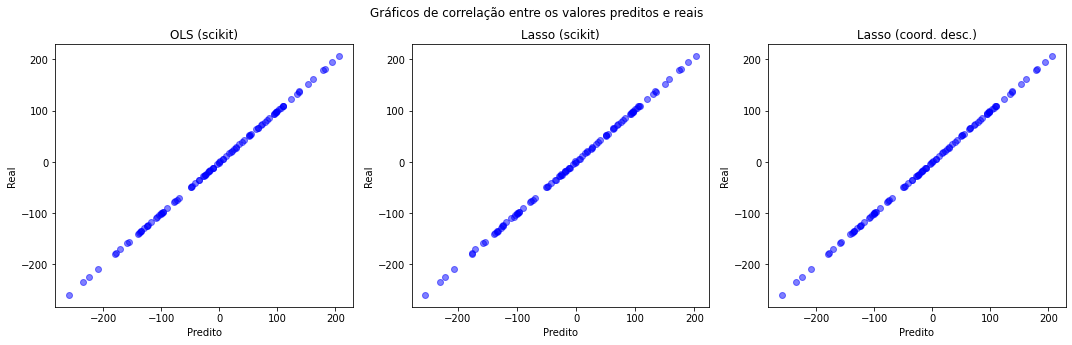

vendo resposta ao parâmetro de regularização do nosso modelo


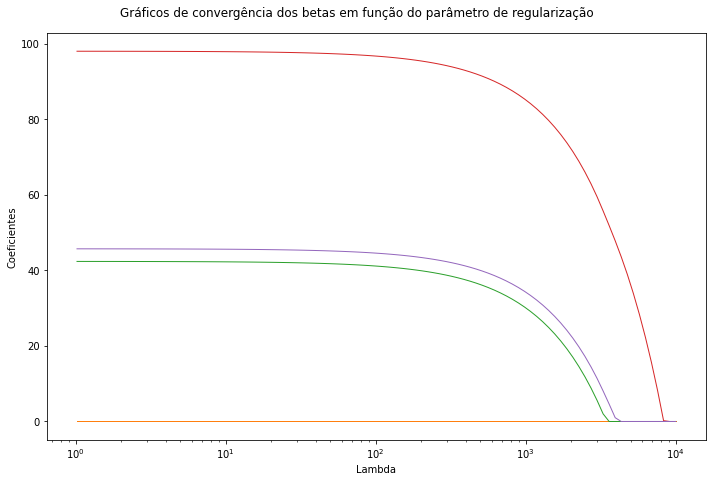

Caso de teste 1: com bias, com 3/5 das variáveis informativas
Testando implementações
Coeficientes originais:
	[ 0.          0.         42.37063535 97.99623263 45.70587613]
OLS
	[-1.73952656e-15 -7.10542736e-15  4.23706353e+01  9.79962326e+01
  4.57058761e+01]x.T + 4.9999999999999964
Lasso
	[ 0.          0.         41.12647778 96.70231756 44.53675784]x.T + 4.785123971397773
Lasso CD
	[ 0.          0.         42.37050368 97.9961     45.70574823]x.T + 4.999876902691247


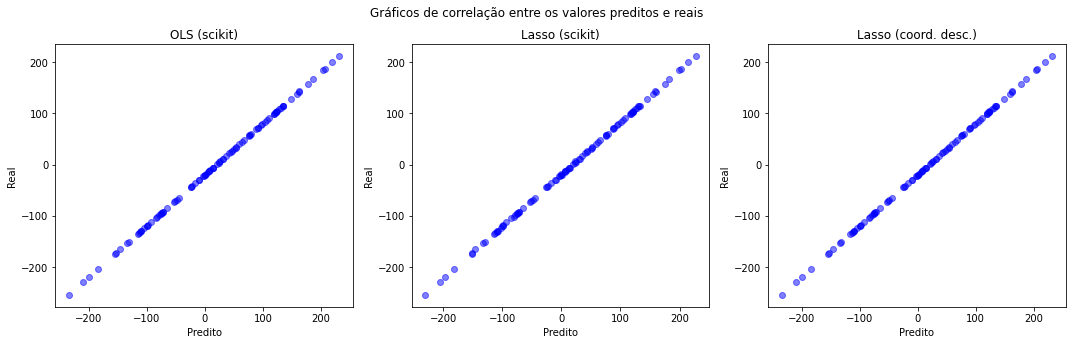

vendo resposta ao parâmetro de regularização do nosso modelo


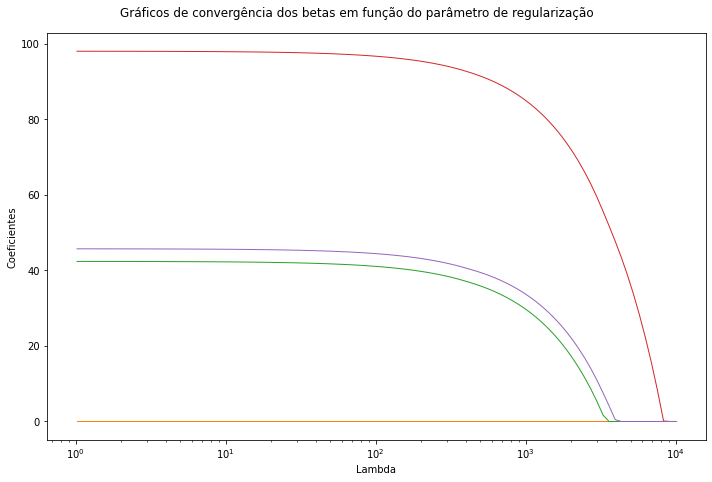

Caso de teste 2: sem bias, com todas as variáveis informativas
Testando implementações
Coeficientes originais:
	[97.99623263 45.70587613 11.73155642 85.71249175 42.37063535]
OLS
	[97.99623263 45.70587613 11.73155642 85.71249175 42.37063535]x.T + -8.881784197001252e-15
Lasso
	[96.8779651  44.51402308 10.84637782 85.02185843 41.18944364]x.T + -0.14667360480035718
Lasso CD
	[97.9961215  45.70575819 11.73146552 85.71242406 42.37051833]x.T + 0.0


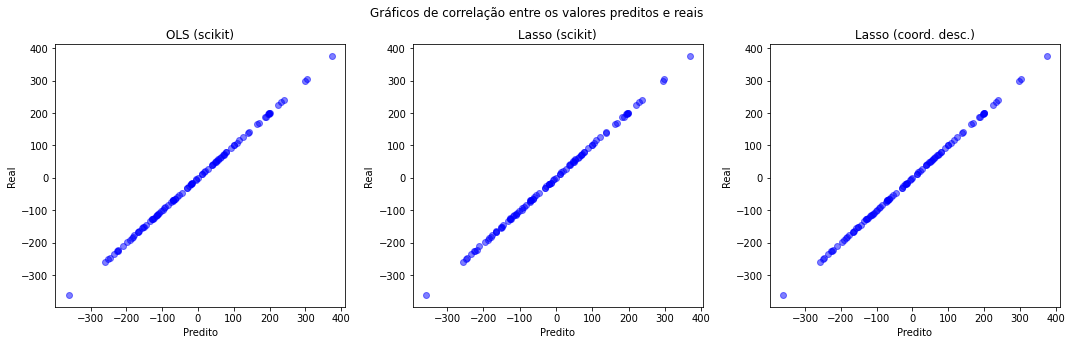

vendo resposta ao parâmetro de regularização do nosso modelo


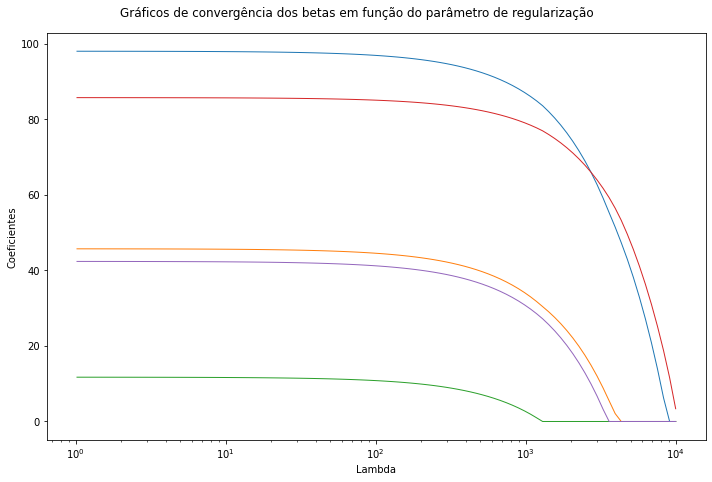

Caso de teste 3: sem bias, sem nenhuma variável informativa
Testando implementações
Coeficientes originais:
	[0. 0. 0. 0. 0.]
OLS
	[0. 0. 0. 0. 0.]x.T + 0.0
Lasso
	[0. 0. 0. 0. 0.]x.T + 0.0
Lasso CD
	[0. 0. 0. 0. 0.]x.T + 0.0


/home/galdeia/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


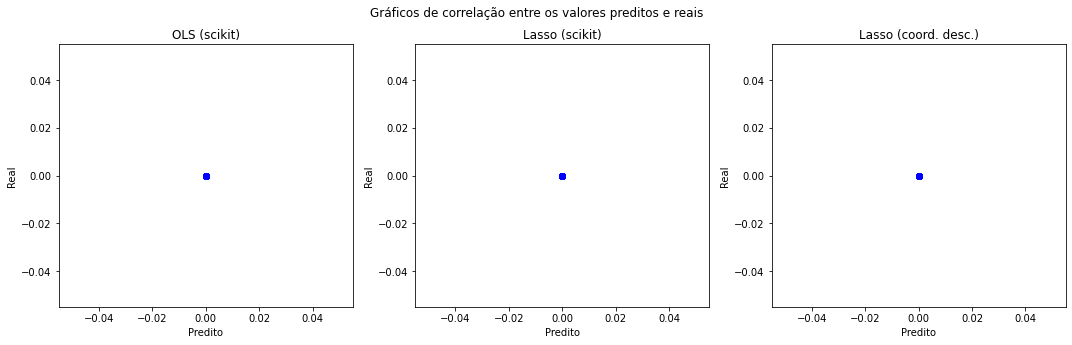

vendo resposta ao parâmetro de regularização do nosso modelo


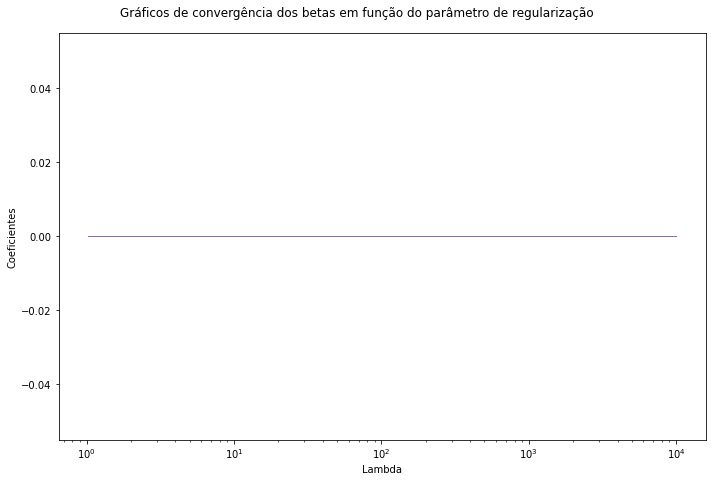

In [6]:
# Executando alguns testes

test_cases = [
    # (bias, n_features, n_samples, n_informative, title)
    (0.0, 5, 100, 3, 'sem bias, com 3/5 das variáveis informativas'),
    (5.0, 5, 100, 3, 'com bias, com 3/5 das variáveis informativas'),
    (0.0, 5, 100, 5, 'sem bias, com todas as variáveis informativas'),
    (0.0, 5, 100, 0, 'sem bias, sem nenhuma variável informativa'),
]


for i, test_case in enumerate(test_cases):
    
    bias, n_features, n_samples, n_informative, title = test_case
    
    print(f'Caso de teste {i}: {title}')
    
    X, y, coef = generate_data(bias, n_features, n_samples, n_informative)
    
    print('Testando implementações')
    print(f'Coeficientes originais:\n\t{coef}')
    compare_scikit_implementation(X, y)
    
    print('vendo resposta ao parâmetro de regularização do nosso modelo')
    lambda_convergence(X, y)

# Conclusões

Vemos que o Lasso pode ajudar a diminuir o _overfit_ e melhorar os resultados por restringir o espaço de busca a soluções esparsas. Isso também pode gerar um aumento na interpretabilidade do resultado obtido, por diminuir a quantidade de termos utilizados, e inclusive por esse motivo o Lasso é utilizado no campo de ML como um pré processamento para diminuir a dimensionalidade dos dados.

Pelo gráfico de convergência, utilizando os dados gerados artificialmente, vemos que no momento em que o lambda se torna maior que a menor importância de variável, o algoritmo "quebra" e passa a dar resultados incorretos. Isso ocorre pois o tamanho do passo é maior que o mínimo necessário para ajustar corretamente a importância daquela variável.